<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [121]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [1]:
import gc
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utilities import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Loading the Dataset

In [36]:
df = pd.read_csv('data/network_backup_dataset.csv')

In [37]:
df.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [38]:
df.drop('Backup Time (hour)', axis=1, inplace=True)
df.columns = ['week', 'dow', 'hod', 'id', 'name', 'target']

In [39]:
dayOfWeek={'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['dow'] = df['dow'].map(dayOfWeek)

In [41]:
features = df.columns.values.tolist()[:5]

lb_en = LabelEncoder()
for feature in features:  # Just label-encode everything.
    df[feature] = lb_en.fit_transform(df[feature])
    
x = df[features_renames]
y = df['target']

In [42]:
df.head()

,week,dow,hod,id,name,target
0,0,0,0,0,0,0.0
1,0,0,0,2,4,0.0
2,0,0,0,2,5,0.0
3,0,0,0,2,6,0.0
4,0,0,0,2,8,0.0


## (a)

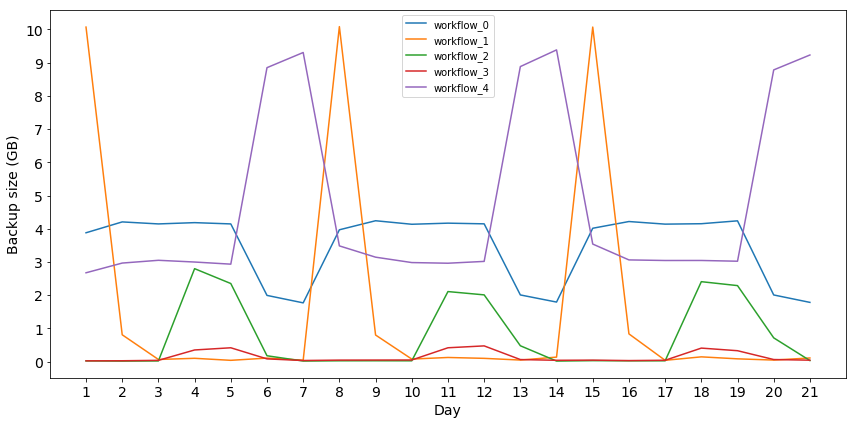

In [122]:
data = df.groupby(['week', 'dow', 'id']).agg({'target': 'sum'}).unstack()
data.columns = ["workflow_" + str(x) for x in data.columns.get_level_values(1).tolist()]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for i in range(5):
    ax.plot(np.arange(21), data.iloc[:21, i])

ax.set_xticks(np.arange(21))
ax.set_xticklabels(np.arange(21)+1, fontdict={'fontsize': 14})
ax.set_xlabel('Day', fontdict={'fontsize': 14})
ax.set_yticks(np.arange(11))
ax.set_yticklabels(np.arange(11), fontdict={'fontsize': 14})
ax.set_ylabel('Backup size (GB)', fontdict={'fontsize': 14})
ax.legend()

fig.tight_layout()
fig.savefig('report/figures/1-a.png', dpi=300)

## (b)

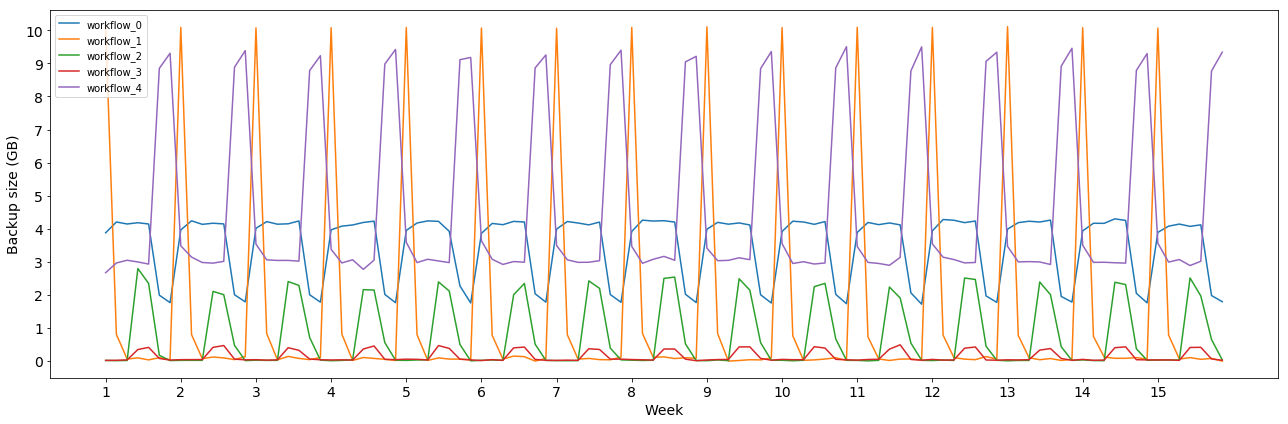

In [123]:
data = df.groupby(['week', 'dow', 'id']).agg({'target': 'sum'}).unstack()
data.columns = ["workflow_" + str(x) for x in data.columns.get_level_values(1).tolist()]

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
for i in range(5):
    ax.plot(np.arange(105), data.iloc[:, i])

ax.set_xticks(np.arange(0, 105, 7))
ax.set_xticklabels(np.arange(15)+1, fontdict={'fontsize': 14})
ax.set_xlabel('Week', fontdict={'fontsize': 14})
ax.set_yticks(np.arange(11))
ax.set_yticklabels(np.arange(11), fontdict={'fontsize': 14})
ax.set_ylabel('Backup size (GB)', fontdict={'fontsize': 14})
ax.legend()

fig.tight_layout()
fig.savefig('report/figures/1-b.png', dpi=300)

# Predict
## (a) Linear

## (b) Random Forest

## (c) Neural Network

## (d) Predict each workflow seperately

## (e) kNN